# Empalme con la clase anterior.
## Funcion de activacion "softmax"
Esta se usa para multiclases (mas de dos clases). Se comporta como una probabilidad $[0,1]$, creciente para cada clase.

$$\text{Softmax}(z_i) = \sigma(\sigma_i) = \frac{\exp(z_i)}{\sum_{j=1}^k \exp{z_j}} $$
donde $K>2$. Para $K=2$ esta funcion se reduce a la sigmoid logistics (de la clase anterior) este es un ejercicio para el estudiante.  Los $\sigma(z_i)$ son todos numeros reales en $[0,1]$ y se pueden interpretar como una probabilidad.

[el manual de Keras](https://keras.io/api/layers/activations/#elu-function) muestra la mayoria de las funciones aca explicadas.



# Propagacion hacia adelante en una ANN. (forward propagation).

Por ahora vamos a pensar en fully connected (densed) networks.
En la literatura es comun ver que separan el bias de los demas parametros. Es decir

$$ h(\theta, x) = \theta_0 + [\theta_1 x_1 +
\theta_2 x_2 + \cdots + \theta_n x_n] =
\theta_0 + (\theta_1, \theta_2, \cdots , \theta_n) . (x_1, x_2, \cdots, x_n).$$
Pero en mi concepto es mejor manejar todo "junto". Es decir
pensar $x_0=1$, y escribir mejor$$ h(\theta, x) = \theta_0 + \theta_1 x_1 +
\theta_2 x_2 + \cdots + \theta_n x_n =
 (\theta_0, \theta_2, \cdots , \theta_n) . (1, x_1, x_2, \cdots, x_n).$$

El sistema $Ax +b $ lo vamos a condensar en un solo termino
donde $A$ es una matrix de $m \times n$ y $b \in \mathbb{R}^m$.

Es decir, escribimos
$$
\begin{pmatrix}
b_1 & a_{11} & a_{12} & \cdots & a_{1n} \\
b_2 & a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots  \\
b_m & a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{pmatrix}
\begin{pmatrix}
1 \\
x_1 \\
\vdots \\
x_n
\end{pmatrix}
= Ax + b
.$$



A veces usamos las transpuestas en vez de las matrices sin transponer. Por ejemplo en la propagacion hacia adelante, comenzamos con un vector $x$ y una matriz $\Theta$ y un "bias" $b$
y escribimos

$$ x^T \Theta + b $$
con $x \in \mathbb{R}^n$,
$\Theta \in \mathbb{R}^{n \times m}$, $b \in \mathbb{R}^[1 \times m$. $b$ es un vector fila.
En este caso escribimos esta operacion en forma matricial como sigue


$$
\begin{pmatrix}
1 & x_1 & x_2 & \cdots x_n
\end{pmatrix}
\begin{pmatrix}
b_1 & b_2 & \cdots & b_m \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm} \\
\end{pmatrix}
.$$

Para uniformizar mas la cosa los $b$s los llamamos $\theta_0$,
es decir $b_1= \theta_{01}$, \cdots $b_m=\theta_{0m}$.

$$
\begin{pmatrix}
1 & x_1 & x_2 & \cdots x_n
\end{pmatrix}
\begin{pmatrix}
\theta_{01} & \theta_{02} &  \cdots & \theta_{0m} \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm} \\
\end{pmatrix}
.$$

Podemos pensar en un conjunto $m$ de vectores de $n$ dimensiones de entrada.

Podemos convertir el problema anterior en:



$$
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots x_{1n} \\
1 & x_{21} & x_{22} & \cdots x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots x_{mn} \\
\end{pmatrix}
\begin{pmatrix}
\theta_{01} & \theta_{02} &  \cdots & \theta_{0m} \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm} \\
\end{pmatrix}
.$$

Con esto, escribimos el proceso de propagacion hacia adelante usando matrices.



El proceso (propagacion hacia adelante) es el siguiente

* Comenzamos con los de entrada $X \in \mathbb{R}^{m \times n}$.
Recuerde que a $X$ le debe agregar una columna de unos.
Con esto encontramos la primera operacion "neuronal"

$$ Z^{(1)} = X \Theta^{(1)}. $$
Done el indice arriba entre parentesis indica la capa.
Si esto fuera un vector fila y lo queremos columa, lo transponemos
es decir escribimos

$$ (\Theta^{(1)})^T X.$$
Las activaciones en el pseudocodigo las llamamos con $A$ mayuscula. Para comenzar llamamos $X= A^{(0)}$.

$$ A^{(1)}= f(Z^{(1)})$$, donde $f$ es la funcion de activacion.

* Repetimos este proceso capa-por-capa hasta llegar la ultima capa donde escribimos.

$$A^{(L)} = f(Z^{(L)}) = h(\Theta, X) .$$
donde $\Theta^{(i)}$, $i=1,2, \cdots, L$.
Veamos el algoritmo.

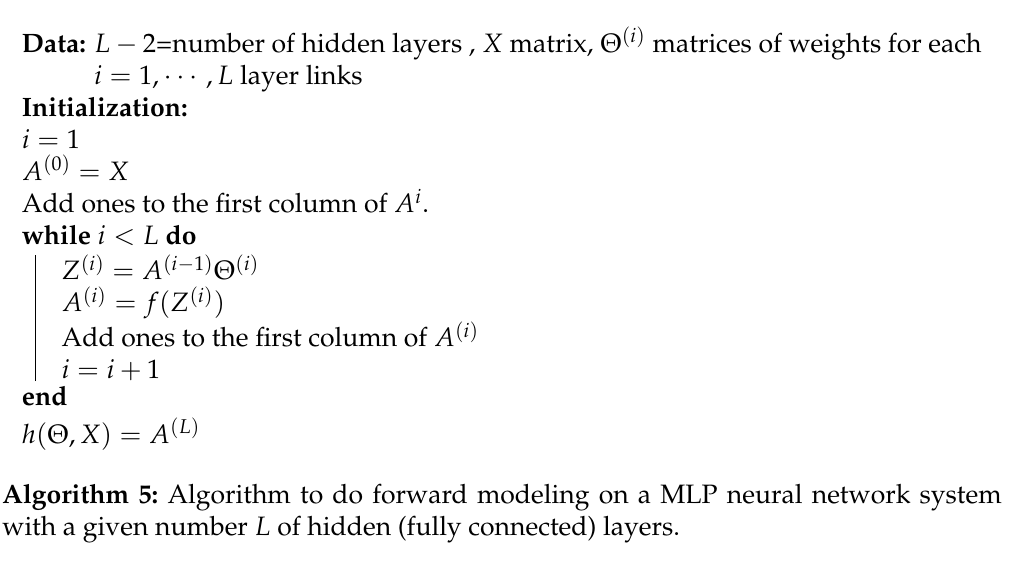

El tensor de rango 3 de $\theta_{ij}^{(k)}$, son los enlaces entre dos capas consecutivas. La capa $k-1$ y la capa $k$, el nodo de salida $i$ y el de entrada $j$. El tensor $\Theta$
se inicializa aleatoriamente con algun valor. Se hace la propagacion hacia adelante como lo explica el algoritmo hasta llegar al final, a la capa de salida. Luego se va a hacer "backpropagation" (lo explico enseguida) en esta propagacion hacia atras se **actualiza** el tensor $\Theta$ desde la capa $L$ hasta la capa $1$, usando el gradiente de la misma forma que hemos visto.  $\theta_{pq}^{(i+1)} = \theta_{pq}^{(i)} - \eta \nabla_{\theta} ( \theta^{(i)}_{pq})$

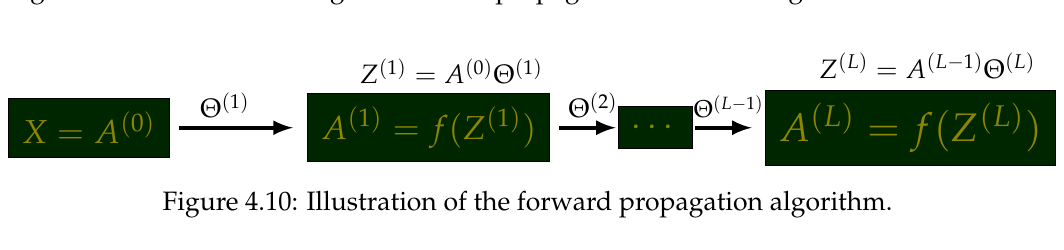

# Propagacion hacia atras. Backpropagation.
Esta es la magia detras de las redes neuronales.
Esta seccion es la que mas matematica tiene. Necesita calculo en varias variables (lo del gradiente).

Toda red neuronal usa una funcion de costo (error). Esta funcion de costo se quiere minimzar. Esto se hace con el metodo del gradiente.

La funcion de costo se puede partir en $m$ funciones de costo (para cada dato).

$$C(\theta) = \frac1m \sum_{i=1}^m C_i (\Theta) .$$
Esto lo hago para solo fijarme en $C_i(\Theta)$ y evitarme la suma, que al final del proceso taca hacerla.

Los parametros de ML son el tensor de rango 3 $\Theta$,
y el gradiente de esta funcion de costo con respecto a $\Theta$
esta dado por las derivadas parciales

$$ \frac{\partial C_i(\Theta)}{\partial \theta_{kj}^{(\ell)}} .$$
Esto es un tensor de orden 4. Para no confundirme mucho, voy a borrar la $i$ (al final la puedo colocar y hacer la suma de arriba.


$$ \frac{\partial C(\Theta)}{\partial \theta_{kj}^{(\ell)}} .$$

Vamos a hallar este gradiente. Para esto usamos la regla de cadena con los parametros intermedios $z_i$. Es decir,

$$ \frac{\partial C}{ \partial \theta_{kj}^{(\ell)}}
= \frac{\partial C}{\partial z_j^{\ell}} \frac{\partial z_j^{\ell}}{\partial \theta_{kj}^{(\ell)}} \quad j, \ell \text{  fijos} \tag{1} .$$

$j=1, 2, \cdots n_{\ell}$, $k=1, 2, \cdots, n_{\ell-1}$.
donde $n_i$ es el numero de nodos de la capa $i$.

Para calcular estas derivadas parciales recordamos que

$$z_j^{\ell} = \sum_p a_p^{\ell-1} \theta_{pj}^{\ell} .$$
Podemos calcular las derivadas parciales aca como

$$ \frac{\partial z_j^{\ell}}{\partial \theta_{kj}^{(\ell)}}
= \sum_p  \frac{\partial \theta_{pj}^{(\ell)}}{\partial \theta_{kj}^{(\ell)}} a_p^{\ell-1} = \sum_p \delta_{pk} a_p^{\ell -1} = a_k^{\ell-1} . $$


De la ecuacion (1) el primer factor (de la derecha)
De la ecuacion (1) el primer factor( (de la derecha)

Lo bautizamos, por comodidad

$$ d_j^{\ell} = \frac{\partial C}{\partial z_j^{\ell}}. $$

Comenzamos al final de la red con la funcion de costo
$C(\Theta) = C( a^L ( z^L)). $
Usando la regla de la cadena otra vez:

$$ d_j^{\ell} = \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^{L}}{\partial z_j^{L}}.$$
$j$ es fijo por que no hay dependencia entre nodos de la misma capa.
Es decir

$$ d_j^{L} = \frac{\partial C}{\partial a_j^L} f'(z_j^{L}).$$
donde $f$ a la funcion de activacion (ver las funciones de activacion). Esa derivada es facil por que las funciones de activacion (clase anterior) son analiticas. La deriva de $C$ tambien es facil por que $C$ es la funcion de costo.

Esta expresion se puede escribir como

$$ d^{(L)} = \nabla_{a^L} C \circ f'(z^{(L)})  .$$

Con esto ya tenemos todos elementos de la ultima capa.
Toca propagar hacia la primera capa. Como lo hacemos?

Las funciones $z^{\ell}$ y $z^{\ell+1}$ estan relacionadas.
Pensemos en la function $z_j^{\ell} = g(z_1^{\ell+1}, z_2^{\ell+1}, \cdots, z_{n_{\ell}}^{\ell+1}) $, donde $n_{\ell}$ es el numero de nodos de la capa $\ell$

Entonces observemos


\begin{eqnarray}
d_j^{\ell} &=&  \frac{\partial C}{\partial z_j^{\ell}} \\
&=& \sum_k  \frac{\partial C}{\partial z_k^{\ell+1}}
\frac{\partial z_k^{\ell+1}}{\partial z_j^{\ell}} \\
&=& \sum_k d_k^{\ell+1}
\frac{\partial z_k^{\ell+1}}{\partial z_j^{\ell}} \\
\end{eqnarray}
Para calcular las ultimas derivadas parciales recordemos que


$$z_k^{\ell+1} =\sum_p a_p^{\ell} \theta_{pk}^{\ell+1} = \sum_k \theta_{pk}^{\ell+1} f(z_p^{\ell}) .$$

$$\frac{\partial z_k^{\ell+1}}{\partial z_j^{\ell}} =
\sum_k \theta_{pk}^{\ell+1} f'(z_p^{\ell})  \frac{z_p^{\ell}}{\partial z_j^{\ell}}  = \sum_k \theta_{pk}^{\ell+1} f'(z_p^{\ell})  \delta_{pj} = \theta_{jk}^{\ell+1} f'(z_j^{\ell}).$$

De forma que

$$ d_j^{\ell} = \sum_k d_k^{\ell+1} \theta_jk^{\ell+1} f'(z_j^{\ell})  .$$

Podemos escribir esto como

$$ d^{\ell} = \Theta^{\ell+1} d^{\ell+1} \circ f'(z^{\ell}) .$$











Tenemos el siguiete algoritmo
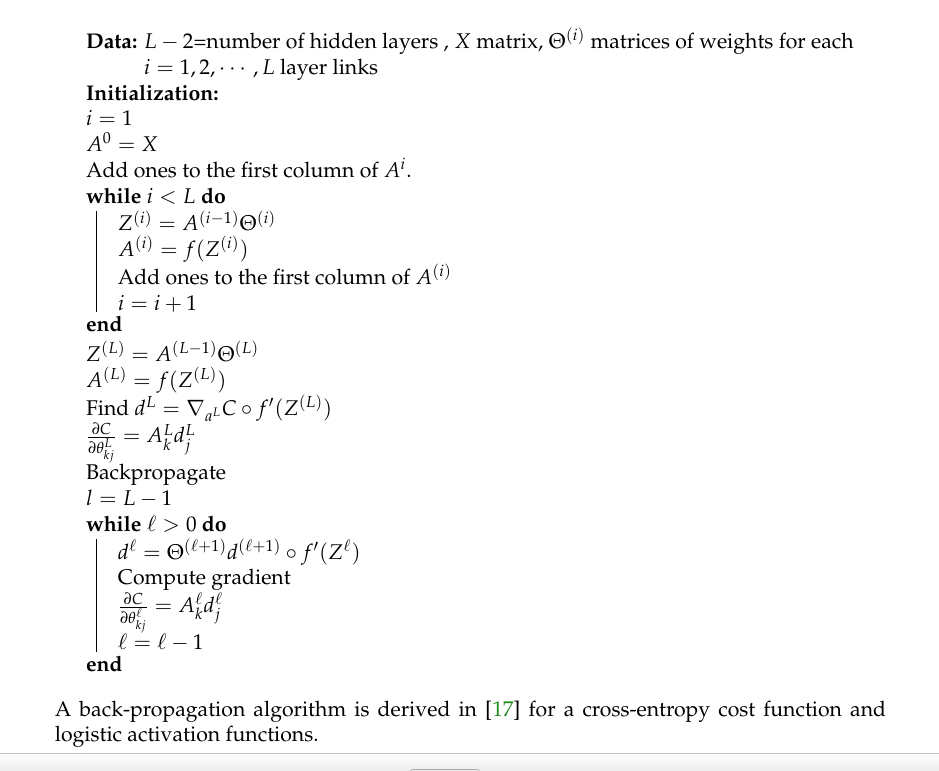